In [3]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
import matplotlib.pyplot as plt
import math as m

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Covariance matrix: 
[[ 1.06101944  0.89340007  3.01543894]
 [ 0.89340007  9.53854268 11.32534281]
 [ 3.01543894 11.32534281 17.3562207 ]]

Eigenvalues: 
 [25.79+0.j -0.  +0.j  2.17+0.j]
Eigenvectors: 
 [[-0.12  -0.816  0.565]
 [-0.572 -0.408 -0.711]
 [-0.811  0.408  0.418]]

Eigenvalues with SVD: 
 [25.85  0.    2.17]
Eigenvectors with SVD: 
 [[-0.12  -0.816  0.565]
 [-0.572 -0.408 -0.712]
 [-0.812  0.408  0.418]]

Verify that the eigenvectors coincide (with an accurancy of 0.01): True
Verify that the eigenvalues coincide (with an accurancy of 0.1): True

For eigenvalue 1 the percent of the total dataset's variability is: 92.240870552052385 %
For eigenvalue 2 the percent of the total dataset's variability is: 0.000000000000004 %
For eigenvalue 3 the percent of the total dataset's variability is: 7.759129447947618 %

Only two pricipal components (the first and the third) contains more then 99% of the total variability, in fact when the dataset was constructed x3 was a combination of x1 

Text(0.5, 1.0, '1 vs 2 PCA')

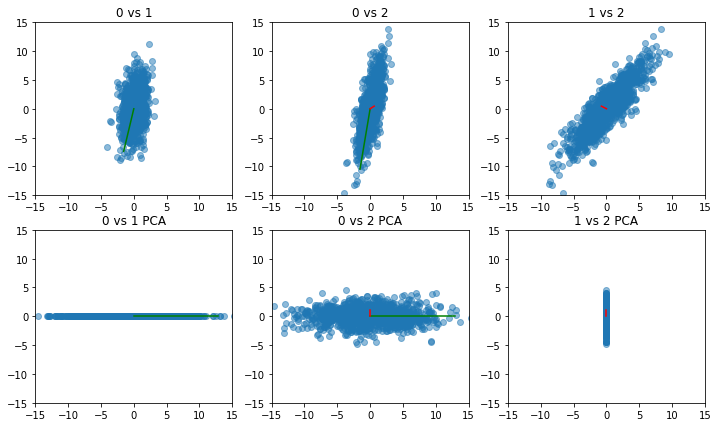

In [72]:
npr.seed(2053854)
#1
x1=npr.normal(loc=0, scale=1, size=1000)
x2=x1+npr.normal(loc=0, scale=3, size=1000)
x3=2*x1+x2

M=np.array([x1,x2,x3])

#2
covM=np.cov(M)
print("Covariance matrix: \n{}\n".format(covM))
l, V = la.eig(covM)
print("Eigenvalues: \n {}".format(l.round(2)))
print("Eigenvectors: \n {}\n".format(V.round(3))) 

#3
U, spectrum, Vt = la.svd(M)
U[:,[1,2]]=U[:,[2,1]]
spectrum[[1,2]]=spectrum[[2,1]]


print("Eigenvalues with SVD: \n {}".format((spectrum**2/(len(x1-1))).round(2)))
print("Eigenvectors with SVD: \n {}\n".format(U.round(3)))

#può andare?
print("Verify that the eigenvectors coincide (with an accurancy of 0.01): {}".format(np.allclose(U.round(2), V.round(2))))
print("Verify that the eigenvalues coincide (with an accurancy of 0.1): {}\n".format(np.allclose((spectrum**2/len(x1-1)).round(1), (np.real_if_close(l)).round(1))))

#4
for i in range(len(l)):
    print("For eigenvalue {} the percent of the total dataset's variability is: {:.15f} %".format(i+1, 100*abs(np.real_if_close(l)[i]/sum(np.real_if_close(l)))))

print( "\nOnly two pricipal components (the first and the third) contains more then 99% of the total variability, in fact when the dataset was constructed x3 was a combination of x1 and x2 \n")
    

    
#5
Mp=np.dot(V.T, M)

#6
scale_factor=0.5

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

ax1.scatter(M[0,:], M[1,:], alpha=0.5)
ax1.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[1,0]], c='g')
ax1.plot([0,scale_factor*l[1]*V[0,1]], [0, scale_factor*l[1]*V[1,1]], c='r') 
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.set_title("0 vs 1")

ax2.scatter(M[0,:], M[2,:], alpha=0.5)
ax2.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[2,0]], c='g')
ax2.plot([0,scale_factor*l[2]*V[0,2]], [0, scale_factor*l[2]*V[2,2]], c='r')
ax2.set_xlim(-15,15)
ax2.set_ylim(-15,15)
ax2.set_title("0 vs 2")

ax3.scatter(M[1,:], M[2,:], alpha=0.5)
ax3.plot([0,scale_factor*l[1]*V[1,1]], [0, scale_factor*l[1]*V[2,1]], c='g')
ax3.plot([0,scale_factor*l[2]*V[1,2]], [0, scale_factor*l[2]*V[2,2]], c='r')
ax3.set_xlim(-15,15)
ax3.set_ylim(-15,15)
ax3.set_title("1 vs 2")

scale_factor=0.5

ax4.scatter(Mp[0,:], Mp[1,:], alpha=0.5)
ax4.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax4.plot([0,0], [0, scale_factor*l[1]], c='r')
ax4.set_xlim(-15,15)
ax4.set_ylim(-15,15)
ax4.set_title("0 vs 1 PCA")

ax5.scatter(Mp[0,:], Mp[2,:], alpha=0.5)
ax5.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax5.plot([0,0], [0, scale_factor*l[2]], c='r')
ax5.set_xlim(-15,15)
ax5.set_ylim(-15,15)
ax5.set_title("0 vs 2 PCA")

ax6.scatter(Mp[1,:], Mp[2,:], alpha=0.5)
ax6.plot([0,scale_factor*l[1]], [0, 0], c='g')
ax6.plot([0,0], [0, scale_factor*l[2]], c='r')
ax6.set_xlim(-15,15)
ax6.set_ylim(-15,15)
ax6.set_title("1 vs 2 PCA")

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Covariance matrix: 
[[ 1.06101944  0.89340007  3.01543894]
 [ 0.89340007  9.53854268 11.32534281]
 [ 3.01543894 11.32534281 17.3562207 ]]

Eigenvalues: 
 [25.79+0.j -0.  +0.j  2.17+0.j]
Eigenvectors: 
 [[-0.12  -0.816  0.565]
 [-0.572 -0.408 -0.711]
 [-0.811  0.408  0.418]]

For eigenvalue 1 the percent of the total dataset's variability is: 92.240870552052385 %
For eigenvalue 2 the percent of the total dataset's variability is: 0.000000000000004 %
For eigenvalue 3 the percent of the total dataset's variability is: 7.759129447947618 %

Comparing with the previous results it is possible to see that in the new coordinates there is a little more variability in the non principal direction. This variability is howerver negligible.


Text(0.5, 1.0, '1 vs 2 PCA')

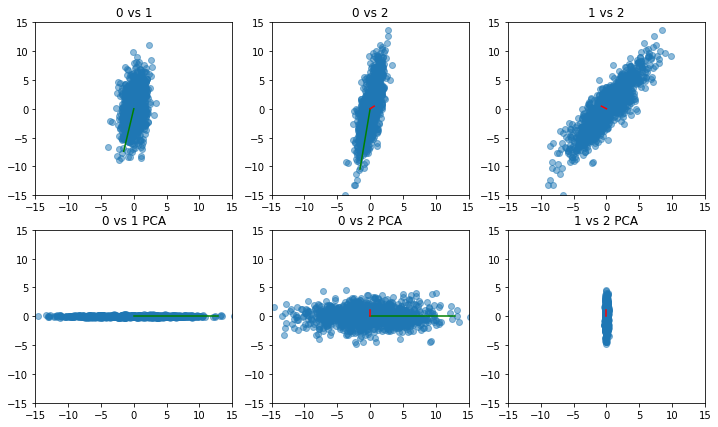

In [76]:
for r in range(10):
    M[0,:]+=npr.normal(loc=0, scale=1/50, size=1000)
    M[1,:]+=npr.normal(loc=0, scale=1/50, size=1000)
    M[2,:]+=npr.normal(loc=0, scale=1/50, size=1000)


print("Covariance matrix: \n{}\n".format(covM))
l, V = la.eig(covM)
print("Eigenvalues: \n {}".format(l.round(2)))
print("Eigenvectors: \n {}\n".format(V.round(3))) 

for i in range(len(l)):
    print("For eigenvalue {} the percent of the total dataset's variability is: {:.15f} %".format(i+1, 100*abs(np.real_if_close(l)[i]/sum(np.real_if_close(l)))))


Mp=np.dot(V.T, M)

#va bene?
print("\nComparing with the previous results it is possible to see that in the new coordinates there is a little more variability in the non principal direction. This variability is howerver negligible.")

scale_factor=0.5

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

ax1.scatter(M[0,:], M[1,:], alpha=0.5)
ax1.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[1,0]], c='g')
ax1.plot([0,scale_factor*l[1]*V[0,1]], [0, scale_factor*l[1]*V[1,1]], c='r')
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.set_title("0 vs 1")

ax2.scatter(M[0,:], M[2,:], alpha=0.5)
ax2.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[2,0]], c='g')
ax2.plot([0,scale_factor*l[2]*V[0,2]], [0, scale_factor*l[2]*V[2,2]], c='r')
ax2.set_xlim(-15,15)
ax2.set_ylim(-15,15)
ax2.set_title("0 vs 2")

ax3.scatter(M[1,:], M[2,:], alpha=0.5)
ax3.plot([0,scale_factor*l[1]*V[1,1]], [0, scale_factor*l[1]*V[2,1]], c='g')
ax3.plot([0,scale_factor*l[2]*V[1,2]], [0, scale_factor*l[2]*V[2,2]], c='r')
ax3.set_xlim(-15,15)
ax3.set_ylim(-15,15)
ax3.set_title("1 vs 2")

scale_factor=0.5

ax4.scatter(Mp[0,:], Mp[1,:], alpha=0.5)
ax4.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax4.plot([0,0], [0, scale_factor*l[1]], c='r')
ax4.set_xlim(-15,15)
ax4.set_ylim(-15,15)
ax4.set_title("0 vs 1 PCA")

ax5.scatter(Mp[0,:], Mp[2,:], alpha=0.5)
ax5.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax5.plot([0,0], [0, scale_factor*l[2]], c='r')
ax5.set_xlim(-15,15)
ax5.set_ylim(-15,15)
ax5.set_title("0 vs 2 PCA")

ax6.scatter(Mp[1,:], Mp[2,:], alpha=0.5)
ax6.plot([0,scale_factor*l[1]], [0, 0], c='g')
ax6.plot([0,0], [0, scale_factor*l[2]], c='r')
ax6.set_xlim(-15,15)
ax6.set_ylim(-15,15)
ax6.set_title("1 vs 2 PCA")

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


Eigenvalues: 
 [3.43502618e-01+0.j 3.37361559e-04+0.j 0.00000000e+00+0.j]
Eigenvalues: 
 [3.43502618e-01+0.j 3.37361559e-04+0.j 8.27524036e-20+0.j]
Eigenvalues: 
 [ 3.43502618e-01+0.j -6.96028610e-18+0.j  3.37361559e-04+0.j]
Eigenvalues: 
 [3.43502618e-01+0.j 3.37361559e-04+0.j 6.21859017e-18+0.j]
Eigenvalues: 
 [ 3.43502618e-01+0.j  3.37361559e-04+0.j -7.35903122e-19+0.j]
Eigenvalues: 
 [ 3.43502618e-01+0.j  3.37361559e-04+0.j -2.25287341e-17+0.j]
Eigenvalues: 
 [ 3.43502618e-01+0.j  3.37361559e-04+0.j -1.64586292e-17+0.j]
(1, 21, 100)

With PCA we have found the only one coordinate that really matters (the first one)


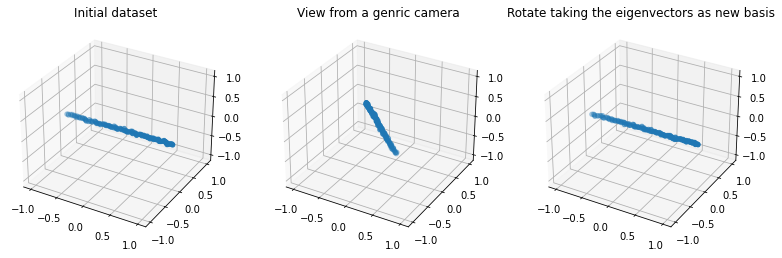

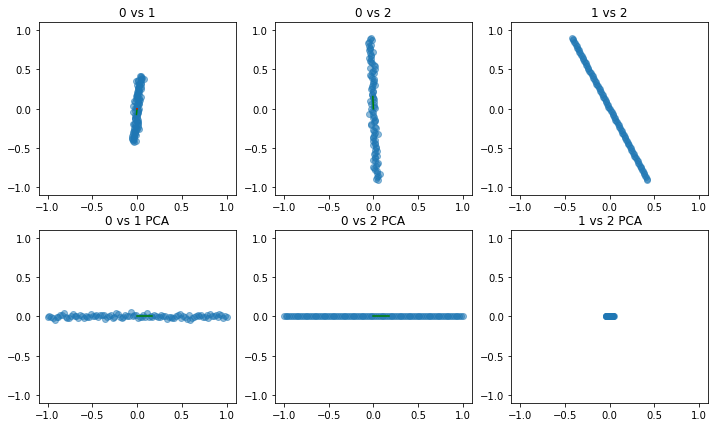

In [87]:
x=np.array(np.linspace(-1,1,100))
y=np.zeros(100)+npr.normal(loc=0, scale=1/50, size=100)
z=np.zeros(100)

Mat=np.array([x, y, z])

fig=plt.figure(figsize=plt.figaspect(0.3))
aax1 = fig.add_subplot(1, 3, 1, projection='3d')
aax1.scatter(Mat[0], Mat[1], Mat[2])
aax1.set_title('Initial dataset')


def MatRot(theta, phi):
    theta=theta*m.pi/180
    phi=phi*m.pi/180
    roty=np.array([[np.cos(phi),0,np.sin(phi)],[0, 1,0], [-np.sin(phi),0,np.cos(phi)]])
    rotz=np.array([[np.cos(theta),-np.sin(theta),0], [np.sin(theta),np.cos(theta),0],[0,0,1]])
    matrot=np.dot(rotz, roty)
    return matrot

theta=[10,20,30,45,50,70,85]
phi=[0,5,38,12,84,65,65]

totMat=[]


for thet, ph in zip(theta, phi):
    #Mat[1,:]+=npr.normal(loc=0, scale=1/500, size=100)
    Matn=np.dot(MatRot(thet, ph),Mat)
    totMat.append(Matn[0])
    totMat.append(Matn[1])
    totMat.append(Matn[2])
    l, V = la.eig(np.cov(Matn))
    print("Eigenvalues: \n {}".format(l))
    #print("Eigenvectors: \n {}".format(V))
    

print(np.array([totMat]).shape)

        

aax2 = fig.add_subplot(1, 3, 2, projection='3d')
aax2.scatter(Matn[0], Matn[1], Matn[2]) 
aax2.set_title('View from a genric camera')


Matp=np.dot(V.T, Matn)

aax3 = fig.add_subplot(1, 3, 3, projection='3d')
aax3.scatter(Matp[0], Matp[1], Matp[2]) 
aax3.set_title('Rotate taking the eigenvectors as new basis')

for a in (aax1,aax2,aax3):
    a.set_xlim(-1.1,1.1)
    a.set_ylim(-1.1,1.1)
    a.set_zlim(-1.1,1.1)


scale_factor=0.5

fig1, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))



ax1.scatter(Matn[0,:], Matn[1,:], alpha=0.5)
ax1.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[1,0]], c='g')
ax1.plot([0,scale_factor*l[1]*V[0,1]], [0, scale_factor*l[1]*V[1,1]], c='r')
ax1.set_title("0 vs 1")

ax2.scatter(Matn[0,:], Matn[2,:], alpha=0.5)
ax2.plot([0,scale_factor*l[0]*V[0,0]], [0, scale_factor*l[0]*V[2,0]], c='g')
ax2.plot([0,scale_factor*l[2]*V[0,2]], [0, scale_factor*l[2]*V[2,2]], c='r')
ax2.set_title("0 vs 2")

ax3.scatter(Matn[1,:], Matn[2,:], alpha=0.5)
ax3.plot([0,scale_factor*l[1]*V[1,1]], [0, scale_factor*l[1]*V[2,1]], c='g')
ax3.plot([0,scale_factor*l[2]*V[1,2]], [0, scale_factor*l[2]*V[2,2]], c='r')
ax3.set_title("1 vs 2")

scale_factor=0.5

ax4.scatter(Matp[0,:], Matp[1,:], alpha=0.5)
ax4.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax4.plot([0,0], [0, scale_factor*l[1]], c='r')
ax4.set_title("0 vs 1 PCA")

ax5.scatter(Matp[0,:], Matp[2,:], alpha=0.5)
ax5.plot([0,scale_factor*l[0]], [0, 0], c='g')
ax5.plot([0,0], [0, scale_factor*l[2]], c='r')
ax5.set_title("0 vs 2 PCA")

ax6.scatter(Matp[1,:], Matp[2,:], alpha=0.5)
ax6.plot([0,scale_factor*l[1]], [0, 0], c='g')
ax6.plot([0,0], [0, scale_factor*l[2]], c='r')
ax6.set_title("1 vs 2 PCA")

for a in (ax1,ax2,ax3,ax4,ax5,ax6):
    a.set_xlim(-1.1,1.1)
    a.set_ylim(-1.1,1.1)

    
print("\nWith PCA we have found the only one coordinate that really matters (the first one)")
    
#for n in range(100):
    ##rivedere 10 variabili

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [5]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2021-12-12 09:55:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1477391 (1,4M) [application/x-httpd-php]
Salvataggio in: "/home/eugenio/data/magic04.data"

magic04.data        100%[===================>]   1,41M   869KB/s    in 1,7s    

2021-12-12 09:55:30 (869 KB/s) - "/home/eugenio/data/magic04.data" salvato [1477391/1477391]

--2021-12-12 09:55:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 5400 (5,3K) [application/x-httpd-php]
Salvataggio in: "/home/eugen